<a href="https://colab.research.google.com/github/jnickg/steganet/blob/main/BackgroundResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
This document contains shared notes, investigations, and findings, for the `steganet` project.

In [ ]:
!rm -rf ./LSB_Steganography
!rm -rf ./StegExpose
!rm -rf ./sample_data

# The Elevator Pitch
## Some Ideas
* Some network that is able to detect regular patterns in a natural image that could indicate the presence of a modulated message in 2D space
* Some network/subnetwork system where there is a general discriminator, and swappable "heads" (e.g. convolutional) that detect different kinds of hidden information (e.g. one head for a particular rules-based technique, another head for a given AI-based technique like SteganoGAN, etc.)
* Some kind of semi-supervised or reinforcement learning system to detect hidden messages (e.g. on the web?)

## Links

* Github Repo: https://github.com/jnickg/steganet

# Research & Investigation
* [A Review on the Various Recent Steganography Techniques (Paper)](http://ijcsn.org/IJCSN-2013/2-6/IJCSN-2013-2-6-152.pdf)  
* [Hiding images in Plain Sight: Deep Steganography (Paper)](https://papers.nips.cc/paper/2017/file/838e8afb1ca34354ac209f53d90c3a43-Paper.pdf)
  * Google paper about DL-based steganography, using ImageNet database, and simultaneous training of a conceal/reveal pair
  * Significantly, they hide images within image containers of the same resolution, which is hard to do (normally you hide a small e.g. text message in a large container)
* [A Customized Convolutional Neural Network with Low Model Complexity for JPEG Steganalysis](https://dl.acm.org/doi/10.1145/3335203.3335734)
  * Deals with discrete cosine transform-embedded steganographic data (in the JPEG compression)
  * Talks about changing a normal CNN architecture to handle DCT-domain detection
* [STFNets: Learning Sensing Signals from the Time-Frequency Perspective with Short-Time Fourier Neural Networks](https://dl.acm.org/doi/10.1145/3308558.3313426)
  * Fourier-domain network
* [Pytorch GAN tutorial](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html )  
* [SteganoGAN paper](https://arxiv.org/pdf/1901.03892.pdf)  
* [Kaggle GAN introduction](https://www.kaggle.com/jesucristo/gan-introduction)  


# SteganoGAN Notes
## Nick
* Encoder $\mathcal{E}(C,M)$ embeds message $M$ into image $C$, producing secret image $S$, but the paper specifies that later $\hat{M}$ is what's retrieved by decoder $\mathcal{D}(S)$. Does that mean SteganoGAN doesn't necessarily extract the same message?
* Sounds like $M\in{0,1}^{D\times W\times H}$ is a data tensor of the same $W\times H$ dimensions as $C$, and some bit depth. This means the max message size is computed based on the dimensions of $C$, and the depth of encoding being used (e.g. $D=2$).
* What does notation $\tt{Conv}_{3\rightarrow32}$ mean? A convolutional layer going from depth 3 (RGB) to depth 32 (i.e. 32 filters)?
* Wasserstein loss = ?
* "Measuring the effective number of bits that can be conveyed per pixel is non-trivial in our setup since the ability to recover a hidden bit is heavily dependent on the model and the cover image, as well as the message itself." ← This makes it sound unreliable to me for general use
* Reed-Solomon error correction
* Dense variant got best score — do we want to use this?

## Mike


*   [Keras actor-critic method](https://keras.io/examples/rl/actor_critic_cartpole/)
*   [Understanding actor-critic tds](https://towardsdatascience.com/understanding-actor-critic-methods-931b97b6df3f)
*   WGAN [Wasserstein loss](https://developers.google.com/machine-learning/gan/loss)
*   

## Jonathan

* [Robust cover image generation using GAN](https://arxiv.org/pdf/1703.05502.pdf)
  * Details a GAN based cover image generator that is more robust against steganographic analysis.
  * The steganalysis tool they built is a 1-d CNN that outputs a confidence score that the provided input contains a hidden message, hidden using the LSB method.
  * They provide a rudementary outline of the steganalysis network's architecture.
* [Survey of deep learning steganalysis networks](https://arxiv.org/pdf/1904.01444.pdf)
  * [Yedroudj-Net](https://github.com/yedmed/steganalysis_with_CNN_Yedroudj-Net) appears to be have better documentation than SRNet.
  * [Yedroudj-Net Paper](https://arxiv.org/pdf/1803.00407.pdf)
  * [SRNet](https://github.com/Steganalysis-CNN/residual-steganalysis) for spatial or Jpeg steganalysis. "Best performing jpeg steganalysis CNN in 2018"

  * [SRNet Paper](http://ws2.binghamton.edu/fridrich/research/SRNet.pdf)


# Stuff We Want to look At
* AI based steganalysis _without original image_
* SteganoGAN - embed data into an image in a way that avoids rules-based steganalysis
* Classifier that is able to detect printed steganographic messaging
* Testing steganalysis tools ability to detect steganographic images using a variety of embedding methods (LSB, etc...).

# Rules-based Steganography
Traditional steganography tends to use rules-based techniques to embed messages in a predictable way. One common technique is to use the least-significant bit of an image's pixels, and some repeatable rule for selecting distributed pixels, to store a bit sequence that reconstructs the message.

The python library `LSB-Steganography` implements LSB message hiding/revealing, and the Sieve of Eratosthenes for pixel selection. We can use this along with a database of raw images as a basic proof of concept that a discriminator is able to identify rules-based steganography. 

## Example
1. We start by uploading a sample image, and showing its raw form

Saving filter2_img.bmp to filter2_img.bmp


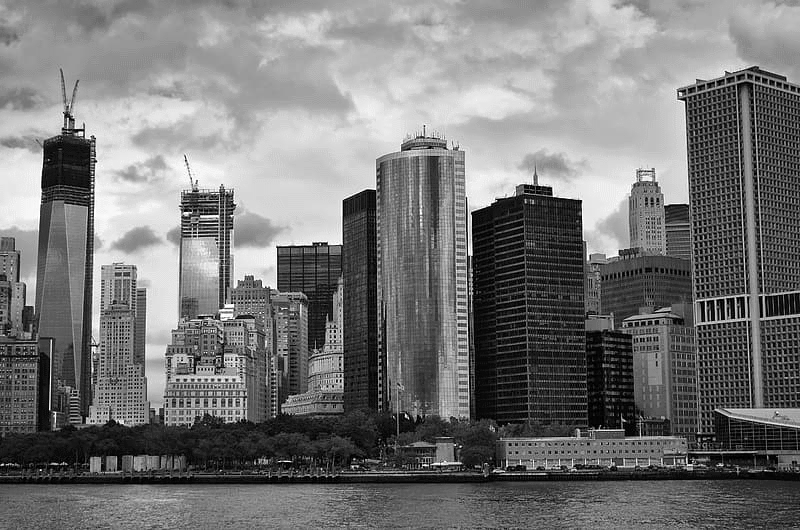

In [ ]:
from google.colab import files
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display

uploaded = files.upload()
sample_images = []
for file in uploaded:
  i = cv.imread(file)
  cv2_imshow(i)
  sample_images.append(i)

2. Next, we embed data using `LSB-Steganography`, save the mutated image, and display it. Note that it is basically imperceptible to humans that any mesage is stored...

In [ ]:
!git clone https://github.com/RobinDavid/LSB-Steganography LSB_Steganography
!pip install -r ./LSB_Steganography/requirements.txt

Cloning into 'LSB_Steganography'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 75 (delta 1), reused 2 (delta 0), pack-reused 68
Unpacking objects: 100% (75/75), done.


In [ ]:
secret_message_base = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.'

Encoding messages of varying lengths (L_1 = 445 to L_n = 5*L_1) into filter2_img.bmp


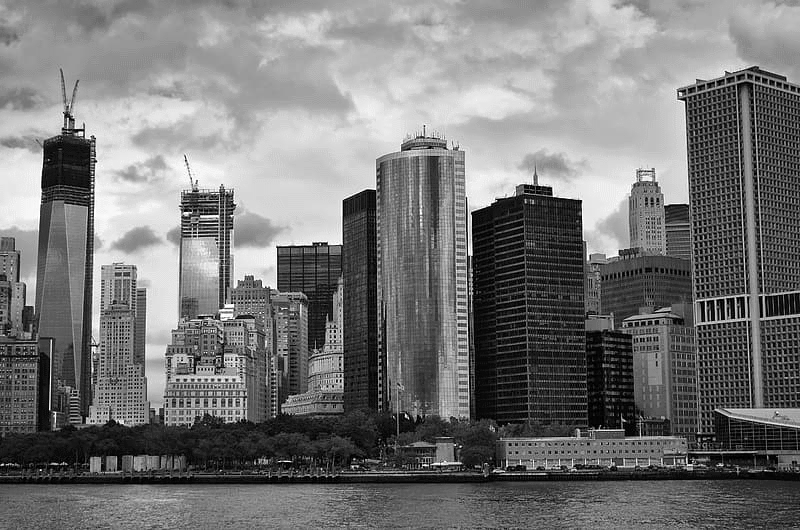

With message length of 11125... 22250... 33375... 44500... 
Done!


In [ ]:
from LSB_Steganography.LSBSteg import LSBSteg

maxlen=5
mutated_files = []
for file in uploaded:
  mutated_for_this_file = []
  base_image = cv.imread(file)
  print(f'Encoding messages of varying lengths (L_1 = {len(secret_message_base)} to L_n = {maxlen}*L_1) into {file}')
  cv2_imshow(base_image)
  print(f'With message length of', end=' ')
  for l in range (1, maxlen):
    steg = LSBSteg(base_image)
    mutated_filename = f'mutated_{l}_{file}'
    mutated_for_this_file.append(mutated_filename)
    secret_message = secret_message_base * l * 25
    print(f'{len(secret_message)}...', end=' ')
    try:
      img_encoded = steg.encode_text(secret_message)
      cv.imwrite(mutated_filename, img_encoded)
    except:
      print(f'\nTerminating early: L_1 * {l} string ({len(secret_message)}) is too long!')
      break
  print(f'\nDone!')
  mutated_files.append(mutated_for_this_file)

3. ...Yet `LSB-Steganography` is able to extract the message easily

In [ ]:
for mutated_set in mutated_files:
  for file in mutated_set:
    im = cv.imread(file)
    steg = LSBSteg(im)
    message = steg.decode_text()
    print(f'Recovered message from image {file}: {len(message)} characters')

Recovered message from image mutated_1_filter2_img.bmp: 11125 characters
Recovered message from image mutated_2_filter2_img.bmp: 22250 characters
Recovered message from image mutated_3_filter2_img.bmp: 33375 characters
Recovered message from image mutated_4_filter2_img.bmp: 44500 characters


5. And diffing the images quickly reveals the presence of a hidden message (note the bright pixels near the top, representing binary differences in the corresponding pixels):

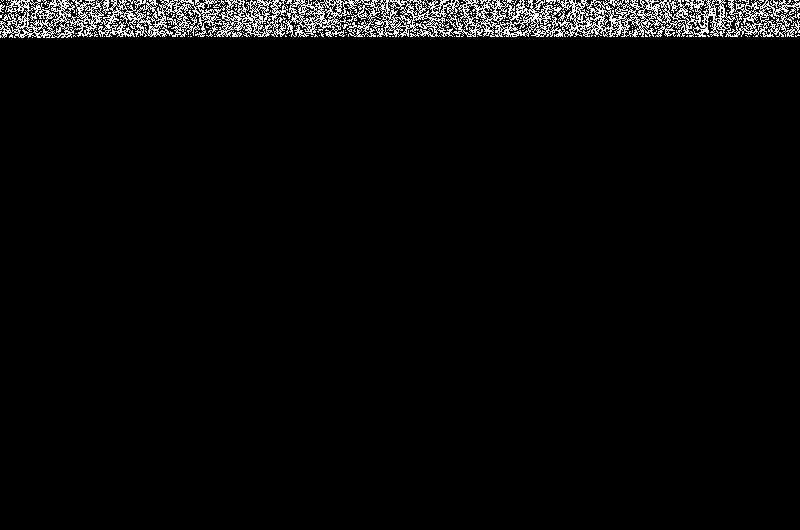

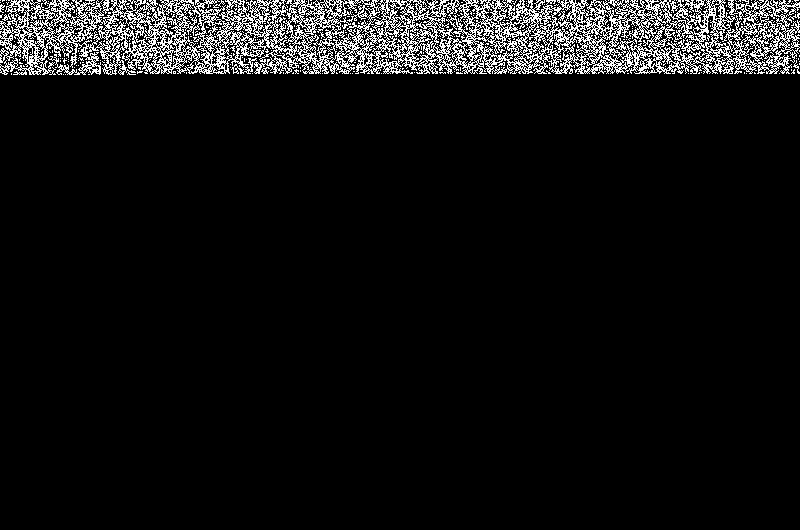

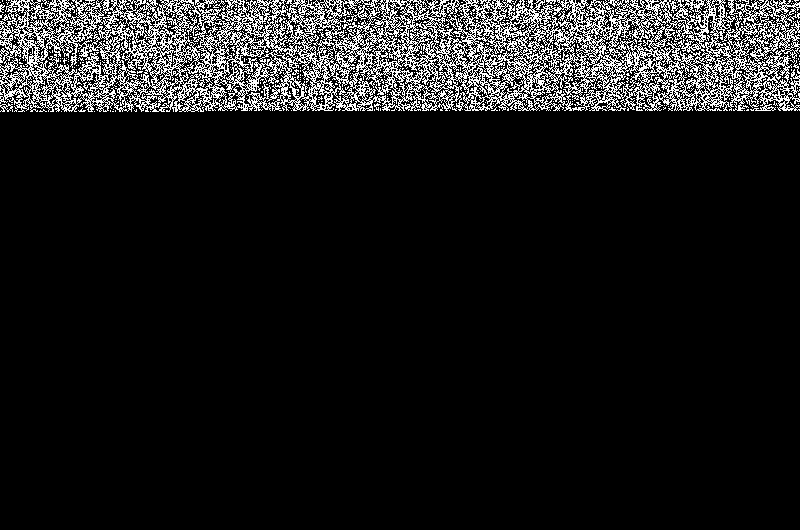

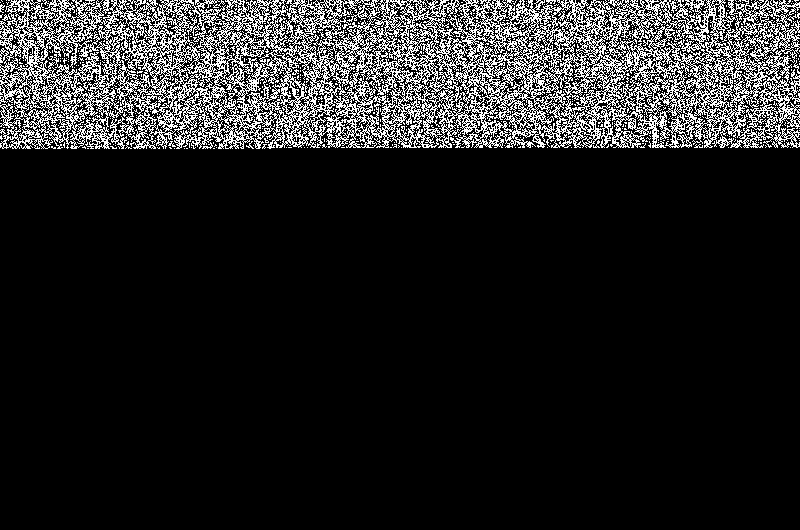

In [ ]:
for (f_orig, f_mut_set) in zip(uploaded, mutated_files):
  i_orig = cv.imread(f_orig, cv.IMREAD_GRAYSCALE)
  for f_mut in f_mut_set:
    i_mut = cv.imread(f_mut, cv.IMREAD_GRAYSCALE)
    diff = cv.absdiff(i_orig, i_mut)
    _, diff = cv.threshold(diff, 0, 255, cv.THRESH_BINARY)
    cv2_imshow(diff)

# Steganalysis Tools

## Statistical

### StegExpose ([code](https://github.com/b3dk7/StegExpose) | [paper](https://arxiv.org/pdf/1410.6656.pdf))
This is referenced in the SteganoGAN paper as their go-to statistical steganalysis tool, but it's written in Java. Luckily, there exists an easy way to [run Java in Colab](https://colab.research.google.com/github/apache/beam/blob/master/examples/notebooks/get-started/try-apache-beam-java.ipynb). Let's try it below with StegExpose.

In [ ]:
# Run and print a shell command.
def run(cmd):
  print('>> {}'.format(cmd))
  !{cmd}  # This is magic to run 'cmd' in the shell.
  print('')

In [ ]:
# Install the Java JDK.
run('apt-get install default-jdk > /dev/null')

# Check the Java version to see if everything is working well.
run('javac -version')

>> apt-get install default-jdk > /dev/null

>> javac -version
javac 11.0.11



In [ ]:
run('git clone https://github.com/b3dk7/StegExpose')

>> git clone https://github.com/b3dk7/StegExpose
Cloning into 'StegExpose'...
remote: Enumerating objects: 314, done.
remote: Total 314 (delta 0), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (314/314), 38.31 MiB | 32.40 MiB/s, done.
Resolving deltas: 100% (133/133), done.



To detect our hidden message compared to the base, StegExpose needs some manual parameter tuning. This is likely due to the relatively short length of our message, with respect to the overall carrier size.

In order to get a good gauge of the efficacy of our implementation of SteganoGAN, it will be best use one/all of the following techniques:
* Encode the same message into the same carrier using different techniques, to gauge relative visibility.
* Encode as large an image as possible into the carrier (determined by the technique yielding lowest capacity), to maximize the visibility of any differences in efficacy.
* Encode using both ordered and disordered information (e.g. repeating text versus random text) to observe any impacts on statistical analysis.

Further, the SteganoGAN paper's reporting on performance w.r.t StegExpose is somewhat sparse. They show an AUROC curve that is better than a random classifier, but as we show below StegExpose can have the same behavior with obvious rules-based techniques, unless the carrier is saturated. Authors do not clearly mention the payload size used.

In [ ]:
run('java -jar ./StegExpose/StegExpose.jar /content/ default 0.17 steg_expose.csv')

from prettytable import from_csv
with open('steg_expose.csv') as fp:
    stegexpose_analysis = from_csv(fp)
    print(stegexpose_analysis)

>> java -jar ./StegExpose/StegExpose.jar /content/ default 0.17 steg_expose.csv

+---------------------------+------------------------+-------------------------------------------------------+---------------------+-----------------------+---------------------+---------------------+---------------------+
|          Field 1          |        Field 2         |                        Field 3                        |       Field 4       |        Field 5        |       Field 6       |       Field 7       |       Field 8       |
+---------------------------+------------------------+-------------------------------------------------------+---------------------+-----------------------+---------------------+---------------------+---------------------+
|         File name         | Above stego threshold? | Secret message size in bytes (ignore for clean files) |     Primary Sets    |       Chi Square      |     Sample Pairs    |     RS analysis     |    Fusion (mean)    |
| mutated_1_filter2_img.bmp

### Next Steps
* Create ROC curve based on StegExpose output (Nick)

## Deep-Learning

### "Deep Learning Hierarchical Representations for Image Steganalysis" ([paper](https://bv.univ-poitiers.fr/access/content/user/bdiall03/PhD_Image_Forensic_XLIM/Articles/CNN-MF/Deep%20Learning%20Steganalysis2017.pdf))
_Ye et al., 2017_

Highlights from this paper:


* They use a novel initialization technique for their CNN architecture, which is to initialize the first layer of convolutional filters with the values representing high pass filters, such as the following three kernels

$$
\frac{1}{6}
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix},\:\:
\frac{1}{9}
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{bmatrix},\:\:
\frac{1}{16}
\begin{bmatrix}
-1 & -2 & -1 \\
-2 & 12 & -2 \\
-1 & -2 & -1
\end{bmatrix}
$$

* Authors introduce the "Truncated Linear Unit," which they claim is more effective at passing meaningful information about low-SNR data.
* Authors use three state-of-the-art steganographic algorithms in spatial domain, e.g., WOW, S-UNIWARD, and HILL, to analyze effectiveness.

Looks like we will need to re-build their architecture in order to reproduce their work. Bummer.

